<a href="https://colab.research.google.com/github/Kaif974/EDA/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EDA 1


Q1.What is the range of selling prices in the dataset?

In [2]:
import pandas as pd

df = pd.read_csv("BIKE DETAILS.csv")
selling_price_range = df['selling_price'].min(), df['selling_price'].max()
print("Range of selling prices:", selling_price_range)


Range of selling prices: (5000, 760000)


Q2.What is the median selling price for bikes in the dataset?

In [ ]:
import pandas as pd

df = pd.read_csv("BIKE DETAILS.csv")
median_price = df['selling_price'].median()
print("Median selling price:", median_price)


Median selling price: 45000.0


Q3.What is the most common seller type?

In [ ]:
import pandas as pd

df = pd.read_csv("BIKE DETAILS.csv")
most_common_seller = df['seller_type'].mode()[0]
print("Most common seller type:", most_common_seller)


Most common seller type: Individual


Q4.How many bikes have driven more than 50,000 kilometers?

In [ ]:
count = df[df['km_driven'] > 50000].shape[0]
print("Number of bikes driven more than 50,000 km:", count)


Number of bikes driven more than 50,000 km: 170


Q5.What is the average km_driven value for each ownership type?

In [ ]:
avg_km_by_owner = df.groupby('owner')['km_driven'].mean()
print(avg_km_by_owner)

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


Q6.What proportion of bikes are from the year 2015 or older?

In [ ]:
proportion = (df['year'] <= 2015).sum() / len(df)
print("Proportion of bikes from 2015 or older:", proportion)


Proportion of bikes from 2015 or older: 0.5664467483506126


Q7.What is the trend of missing values across the dataset?

In [ ]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


Q8.What is the highest ex_showroom_price recorded, and for which bike?

In [ ]:
highest_price_row = df[df['ex_showroom_price'] == df['ex_showroom_price'].max()]
print(highest_price_row[['name', 'ex_showroom_price']])


                           name  ex_showroom_price
134  Harley-Davidson Street Bob          1278000.0


Q9.What is the total number of bikes listed by each seller type?

In [ ]:
seller_counts = df['seller_type'].value_counts()
print(seller_counts)


seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


Q10.What is the relationship between selling_ price and km_driven for first-owner bikes?

In [ ]:
first_owner_bikes = df[df['owner'] == '1st owner']
correlation = first_owner_bikes['selling_price'].corr(first_owner_bikes['km_driven'])
print("Correlation between selling_price and km_driven for 1st owner bikes:", correlation)


Correlation between selling_price and km_driven for 1st owner bikes: -0.2434817484496572


Q11.Identify and remove outliers in the km_driven column using the IQR method

In [ ]:
import pandas as pd

df = pd.read_csv("BIKE DETAILS.csv")
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

print("Original dataset size:", len(df))
print("Dataset size after removing outliers:", len(df_no_outliers))


Original dataset size: 1061
Dataset size after removing outliers: 1022


Q12.Perform a bivariate analysis to visualize the relationship between year and selling_price.

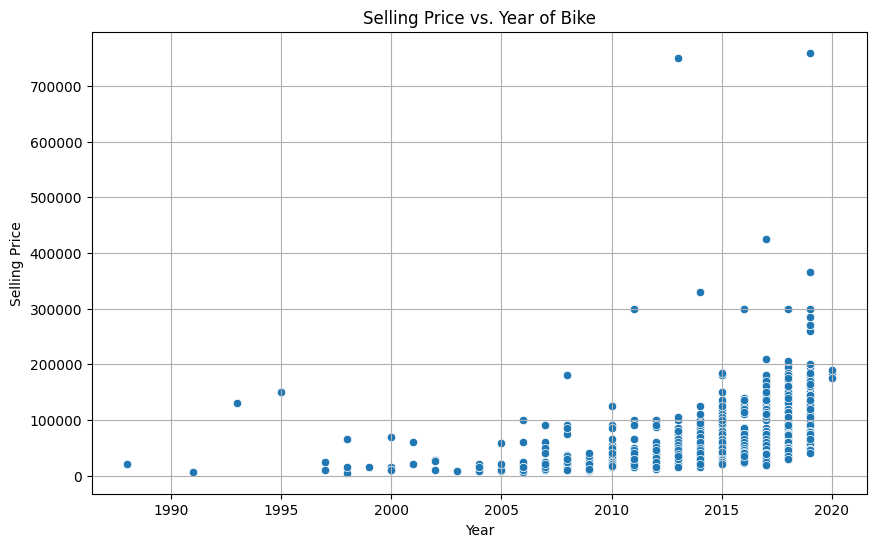

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("BIKE DETAILS.csv")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='year', y='selling_price')
plt.title("Selling Price vs. Year of Bike")
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.grid(True)
plt.show()


Q13.What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?

In [ ]:
import pandas as pd

df = pd.read_csv("BIKE DETAILS.csv")

df['age'] = 2025 - df['year']

avg_price_by_age = df.groupby('age')['selling_price'].mean()

average_depreciation = avg_price_by_age.diff().mean()

print("Average depreciation per year in selling price:", average_depreciation)


Average depreciation per year in selling price: -6049.382716049383


Q14.Which bike names are priced significantly above the average price for their manufacturing year?

In [ ]:
import pandas as pd

df = pd.read_csv("BIKE DETAILS.csv")
avg_price_by_year = df.groupby('year')['selling_price'].mean()
df['avg_price_for_year'] = df['year'].map(avg_price_by_year)
df['price_diff'] = df['selling_price'] - df['avg_price_for_year']
threshold = df['price_diff'].std()
significantly_above_avg = df[df['price_diff'] > threshold]
print(significantly_above_avg[['name', 'year', 'selling_price']])


                                     name  year  selling_price
0               Royal Enfield Classic 350  2019         175000
2     Royal Enfield Classic Gunmetal Grey  2018         150000
7    Royal Enfield Bullet 350 [2007-2011]  2008         180000
13                          Yamaha YZF R3  2019         365000
18    Royal Enfield Classic Gunmetal Grey  2018         150000
..                                    ...   ...            ...
967             Royal Enfield Thunder 350  2015         125000
972                         KTM 390 Duke   2016         115000
976             Royal Enfield Classic 350  2015         110000
981             Royal Enfield Thunder 350  2013         105000
985             Royal Enfield Classic 500  2011          90000

[112 rows x 3 columns]


Q15.Develop a correlation matrix for numeric columns and visualize it using a heatmap.

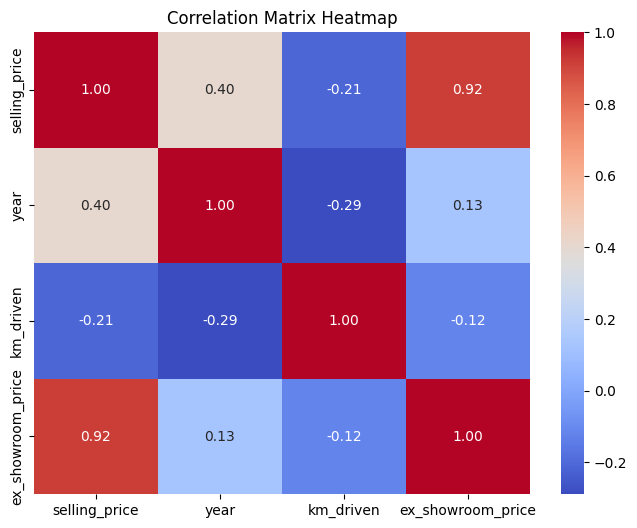

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("BIKE DETAILS.csv")
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()


#EDA 2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv("Car Sale.csv")
df.columns = df.columns.str.replace(' ', '_').str.replace('($)', '', regex=True)
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.rename(columns={'Price ($)\xa0': 'Price'}, inplace=True)

In [ ]:
print("Column names in the dataset:")
print(df.columns.tolist())
df.rename(columns={'Price ($)': 'Price'}, inplace=True)
print("\nColumn names after renaming:")
print(df.columns.tolist())
if 'Price' not in df.columns:
    raise ValueError("Column 'Price' not found after renaming. Please check the column name in the debug output and adjust the renaming step.")


df.columns = df.columns.str.replace(' ', '_')

df['Date'] = pd.to_datetime(df['Date'])

Column names in the dataset:
['Car_id', 'Date', 'Customer_Name', 'Gender', 'Annual_Income', 'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color', 'Price', 'Dealer_No_', 'Body_Style', 'Phone', 'Dealer_Region']

Column names after renaming:
['Car_id', 'Date', 'Customer_Name', 'Gender', 'Annual_Income', 'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color', 'Price', 'Dealer_No_', 'Body_Style', 'Phone', 'Dealer_Region']


Q1.What is the average selling price of cars for each dealer, and how does it compare across different dealers?

In [ ]:
avg_price_by_dealer = df.groupby('Dealer_Name')['Price'].mean().sort_values()
print("\n1. Average selling price by dealer:")
print(avg_price_by_dealer)
print("\nComparison: The dealer with the highest average price is", avg_price_by_dealer.idxmax(),
      "with", avg_price_by_dealer.max(), "and the lowest is", avg_price_by_dealer.idxmin(),
      "with", avg_price_by_dealer.min())


1. Average selling price by dealer:
Dealer_Name
Buddy Storbeck's Diesel Service Inc                27217.261563
Pitre Buick-Pontiac-Gmc of Scottsdale              27404.248408
Chrysler Plymouth                                  27555.526400
McKinney Dodge Chrysler Jeep                       27684.096979
Clay Johnson Auto Sales                            27816.027113
Nebo Chevrolet                                     27818.889415
Hatfield Volkswagen                                27853.712242
New Castle Ford Lincoln Mercury                    27867.131955
Progressive Shippers Cooperative Association No    27884.264036
Ryder Truck Rental and Leasing                     27914.988782
Motor Vehicle Branch Office                        27956.739617
Diehl Motor CO Inc                                 27993.929487
Pars Auto Sales                                    28013.060317
Tri-State Mack Inc                                 28095.562050
C & M Motors Inc                                   2811

Q2.Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?

In [ ]:
price_variance_by_company = df.groupby('Company')['Price'].var().sort_values(ascending=False)
print("\n2. Company with highest price variation:")
print(price_variance_by_company.head(1))
print("This indicates", price_variance_by_company.idxmax(), "has the most inconsistent pricing, suggesting varied models or pricing strategies.")


2. Company with highest price variation:
Company
Lincoln    3.864389e+08
Name: Price, dtype: float64
This indicates Lincoln has the most inconsistent pricing, suggesting varied models or pricing strategies.


Q3.What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?

In [ ]:
transmission_dist = df.groupby('Transmission')['Price'].describe()
iqr_transmission = transmission_dist['75%'] - transmission_dist['25%']
print("\n3. Distribution of car prices by transmission type:")
print(transmission_dist)
print("\nInterquartile ranges (IQR) by transmission:")
print(iqr_transmission)
print("Comparison: Transmission with largest IQR is", iqr_transmission.idxmax(), "indicating more price spread.")


3. Distribution of car prices by transmission type:
                count          mean           std     min      25%      50%  \
Transmission                                                                  
Auto          12571.0  28248.525972  13747.070597  1200.0  19000.0  24000.0   
Manual        11335.0  27914.710631  15862.871978  1700.0  17000.0  22001.0   

                  75%      max  
Transmission                    
Auto          35500.0  75700.0  
Manual        34000.0  85800.0  

Interquartile ranges (IQR) by transmission:
Transmission
Auto      16500.0
Manual    17000.0
dtype: float64
Comparison: Transmission with largest IQR is Manual indicating more price spread.


Q4.What is the distribution of car prices across different regions?

In [ ]:
region_dist = df.groupby('Dealer_Region')['Price'].describe()
print("\n4. Distribution of car prices by region:")
print(region_dist)
print("Regions like", region_dist['mean'].idxmax(), "have the highest average prices, while",
      region_dist['mean'].idxmin(), "has the lowest.")


4. Distribution of car prices by region:
                count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora         3130.0  28334.626837  15026.207252  9000.0  18001.0  23000.0   
Austin         4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
Greenville     3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
Janesville     3821.0  27833.350955  14344.995638  4300.0  18001.0  23000.0   
Middletown     3128.0  27856.338875  14619.842395  1700.0  18000.0  22750.0   
Pasco          3131.0  28119.039923  14659.315941  9000.0  18500.5  23000.0   
Scottsdale     3433.0  27954.958928  14902.916820  1450.0  18000.0  22600.0   

                   75%      max  
Dealer_Region                    
Aurora         35000.0  85800.0  
Austin         35001.0  85601.0  
Greenville     34500.0  85200.0  
Janesville     34000.0  85400.0  
Middletown     34000.0  85300.0  
Pasco   

Q5. What is the distribution of cars based on body styles?

In [ ]:
body_style_dist = df.groupby('Body_Style')['Price'].describe()
print("\n5. Distribution of car prices by body style:")
print(body_style_dist)
print("Body style", body_style_dist['mean'].idxmax(), "has the highest average price.")


5. Distribution of car prices by body style:
             count          mean           std      min      25%      50%  \
Body_Style                                                                  
Hardtop     2971.0  29151.096600  14070.057753  11000.0  19001.0  24000.0   
Hatchback   6128.0  27127.035574  14659.696568   1700.0  18000.0  22000.0   
Passenger   3945.0  28942.031686  16338.856359   9000.0  18000.0  24000.0   
SUV         6374.0  26767.673204  14014.210149   1200.0  18000.0  22350.0   
Sedan       4488.0  29832.802807  14795.682187  11000.0  19000.0  25000.0   

                75%      max  
Body_Style                    
Hardtop     39000.0  82500.0  
Hatchback   31001.0  85600.0  
Passenger   37000.0  85800.0  
SUV         31000.0  85500.0  
Sedan       39500.0  69980.0  
Body style Sedan has the highest average price.


Q6.How does the average selling price of cars vary by customer gender and annual income?

In [ ]:
avg_price_gender_income = df.groupby(['Gender', pd.cut(df['Annual_Income'], bins=5)])['Price'].mean()
print("\n6. Average selling price by gender and income bracket:")
print(avg_price_gender_income)
print("Trends can be observed by comparing means across gender and income brackets.")


6. Average selling price by gender and income bracket:
Gender  Annual_Income          
Female  (-1109.92, 2248064.0]      28218.888484
        (2248064.0, 4486048.0]     30183.052980
        (4486048.0, 6724032.0]     28318.875000
        (6724032.0, 8962016.0]              NaN
        (8962016.0, 11200000.0]             NaN
Male    (-1109.92, 2248064.0]      27996.376891
        (2248064.0, 4486048.0]     29021.878710
        (4486048.0, 6724032.0]     27520.139535
        (6724032.0, 8962016.0]     40333.333333
        (8962016.0, 11200000.0]    26001.000000
Name: Price, dtype: float64
Trends can be observed by comparing means across gender and income brackets.


<ipython-input-22-5b2b2ab029f9>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_gender_income = df.groupby(['Gender', pd.cut(df['Annual_Income'], bins=5)])['Price'].mean()


Q7.What is the distribution of car prices by region, and how does the number of cars sold vary by region?

In [ ]:
region_price_dist = df.groupby('Dealer_Region')['Price'].describe()
region_sales_count = df['Dealer_Region'].value_counts()
print("\n7. Distribution of car prices by region (same as Q4):")
print(region_price_dist)
print("\nNumber of cars sold by region:")
print(region_sales_count)
print("Region", region_sales_count.idxmax(), "sold the most cars, while", region_sales_count.idxmin(), "sold the least.")


7. Distribution of car prices by region (same as Q4):
                count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora         3130.0  28334.626837  15026.207252  9000.0  18001.0  23000.0   
Austin         4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
Greenville     3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
Janesville     3821.0  27833.350955  14344.995638  4300.0  18001.0  23000.0   
Middletown     3128.0  27856.338875  14619.842395  1700.0  18000.0  22750.0   
Pasco          3131.0  28119.039923  14659.315941  9000.0  18500.5  23000.0   
Scottsdale     3433.0  27954.958928  14902.916820  1450.0  18000.0  22600.0   

                   75%      max  
Dealer_Region                    
Aurora         35000.0  85800.0  
Austin         35001.0  85601.0  
Greenville     34500.0  85200.0  
Janesville     34000.0  85400.0  
Middletown     34000.0  85300

Q8.How does the average car price differ between cars with different engine sizes?

In [ ]:
avg_price_region_income = df.groupby(['Dealer_Region', pd.cut(df['Annual_Income'], bins=5)])['Price'].mean()
print("\n8. Average car price by region and income bracket:")
print(avg_price_region_income)
print("Compare means across regions and income brackets to identify trends.")


8. Average car price by region and income bracket:
Dealer_Region  Annual_Income          
Aurora         (-1109.92, 2248064.0]      28286.872782
               (2248064.0, 4486048.0]     29786.500000
               (4486048.0, 6724032.0]     22762.750000
               (6724032.0, 8962016.0]     21000.000000
               (8962016.0, 11200000.0]             NaN
Austin         (-1109.92, 2248064.0]      28233.311728
               (2248064.0, 4486048.0]     30666.750000
               (4486048.0, 6724032.0]     29693.937500
               (6724032.0, 8962016.0]     85000.000000
               (8962016.0, 11200000.0]    26001.000000
Greenville     (-1109.92, 2248064.0]      28220.300568
               (2248064.0, 4486048.0]     27437.944444
               (4486048.0, 6724032.0]     27050.200000
               (6724032.0, 8962016.0]     15000.000000
               (8962016.0, 11200000.0]             NaN
Janesville     (-1109.92, 2248064.0]      27821.914028
               (2248064.0, 44

<ipython-input-24-d3a18c1c673f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_region_income = df.groupby(['Dealer_Region', pd.cut(df['Annual_Income'], bins=5)])['Price'].mean()


Q9.How do car prices vary based on the customer's annual income bracket?

In [ ]:
top_models_by_income = df.groupby([pd.cut(df['Annual_Income'], bins=5), 'Model'])['Car_id'].count().reset_index()
top_models_by_income = top_models_by_income.sort_values('Car_id', ascending=False).groupby(pd.cut(df['Annual_Income'], bins=5)).head(5)
print("\n9. Top 5 car models by income bracket:")
print(top_models_by_income)


9. Top 5 car models by income bracket:
             Annual_Income       Model  Car_id
51   (-1109.92, 2248064.0]    Diamante     398
137  (-1109.92, 2248064.0]  Silhouette     397
109  (-1109.92, 2248064.0]       Prizm     395
81   (-1109.92, 2248064.0]       Jetta     368
106  (-1109.92, 2248064.0]      Passat     366
122  (-1109.92, 2248064.0]         S40     271
21   (-1109.92, 2248064.0]     Bravada     197
48   (-1109.92, 2248064.0]     Cutlass     182
89   (-1109.92, 2248064.0]      Lumina     159
125  (-1109.92, 2248064.0]          SC     142


<ipython-input-26-03fa734c2fa9>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_models_by_income = df.groupby([pd.cut(df['Annual_Income'], bins=5), 'Model'])['Car_id'].count().reset_index()
<ipython-input-26-03fa734c2fa9>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_models_by_income = top_models_by_income.sort_values('Car_id', ascending=False).groupby(pd.cut(df['Annual_Income'], bins=5)).head(5)


Q10.What are the top 5 car models with the highest number of sales, and how does their price distribution look?

In [ ]:
top_sales_models = df['Model'].value_counts().head(5)
price_dist_top_models = df[df['Model'].isin(top_sales_models.index)].groupby('Model')['Price'].describe()
print("\n10. Top 5 models by sales:")
print(top_sales_models)
print("\nPrice distribution of top 5 models:")
print(price_dist_top_models)


10. Top 5 models by sales:
Model
Diamante      418
Prizm         411
Silhouette    411
Passat        391
Ram Pickup    383
Name: count, dtype: int64

Price distribution of top 5 models:
            count          mean           std      min      25%      50%  \
Model                                                                      
Diamante    418.0  22268.303828   9770.768958  12000.0  18000.0  19001.0   
Passat      391.0  19600.728900   8218.521683   9000.0  12001.0  20000.0   
Prizm       411.0  22838.457421   8012.531045  15000.0  16000.0  22000.0   
Ram Pickup  383.0  27820.864230  13297.609534  16000.0  19000.0  21000.0   
Silhouette  411.0  29858.513382  17940.571762  12000.0  14001.0  25000.0   

                75%      max  
Model                         
Diamante    22000.0  49801.0  
Passat      27001.0  32501.0  
Prizm       25000.0  44700.0  
Ram Pickup  39300.0  57750.0  
Silhouette  34500.0  60750.0  


Q11. How does car price vary with engine size across different car colors, and which colors have the highest price variation?

In [ ]:
price_var_engine_color = df.groupby(['Engine', 'Color'])['Price'].describe()
print("\n11. Price variation by engine size and color:")
print(price_var_engine_color)
print("Color with highest average price for Double Overhead Camshaft:",
      price_var_engine_color.loc['DoubleÂ\xa0Overhead Camshaft']['mean'].idxmax())
print("Color with highest average price for Overhead Camshaft:",
      price_var_engine_color.loc['Overhead Camshaft']['mean'].idxmax())


11. Price variation by engine size and color:
                                       count          mean           std  \
Engine                    Color                                            
DoubleÂ Overhead Camshaft Black       4172.0  25766.451103  12418.674126   
                          Pale White  5901.0  30347.987460  14402.413401   
                          Red         2498.0  27434.392314  13499.354247   
Overhead Camshaft         Black       3685.0  31732.967164  17457.405345   
                          Pale White  5355.0  24327.767694  13000.103061   
                          Red         2295.0  30153.405229  17346.642554   

                                          min      25%      50%       75%  \
Engine                    Color                                             
DoubleÂ Overhead Camshaft Black        1200.0  18000.0  23000.0  28501.00   
                          Pale White   4200.0  19001.0  25500.0  41001.00   
                          Red       

Q12.Is there any seasonal trend in car sales based on the date of sale?

In [ ]:
df['Month'] = df['Date'].dt.month
sales_by_month = df.groupby('Month')['Car_id'].count()
print("\n12. Sales by month (seasonal trend):")
print(sales_by_month)
print("Month with highest sales:", sales_by_month.idxmax())


12. Sales by month (seasonal trend):
Month
1      790
2      735
3     1535
4     1655
5     1895
6     1715
7     1725
8     1705
9     3305
10    1830
11    3470
12    3546
Name: Car_id, dtype: int64
Month with highest sales: 12


Q13.How does the car price distribution change when considering different combinations of body style and transmission type?

In [ ]:
price_dist_body_trans = df.groupby(['Body_Style', 'Transmission'])['Price'].describe()
print("\n13. Price distribution by body style and transmission:")
print(price_dist_body_trans)


13. Price distribution by body style and transmission:
                          count          mean           std      min      25%  \
Body_Style Transmission                                                         
Hardtop    Auto          1408.0  31520.188210  13687.756740  12000.0  21001.0   
           Manual        1563.0  27016.943698  14072.501848  11000.0  17575.5   
Hatchback  Auto          3458.0  25910.544824  13144.014337   4200.0  18001.0   
           Manual        2670.0  28702.550562  16284.049616   1700.0  17000.0   
Passenger  Auto          2020.0  28915.835149  13946.481932   9000.0  19000.0   
           Manual        1925.0  28969.521039  18523.684163  10000.0  16001.0   
SUV        Auto          3086.0  27501.404407  13299.927913   1200.0  19000.0   
           Manual        3288.0  26079.019161  14621.526541   2200.0  17000.0   
Sedan      Auto          2599.0  29955.294344  14310.910860  12000.0  19000.0   
           Manual        1889.0  29664.271572  15440.

Q14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?

In [ ]:
df['Engine_Numeric'] = df['Engine'].map({'DoubleÂ\xa0Overhead Camshaft': 1, 'Overhead Camshaft': 0})
correlation = df[['Price', 'Engine_Numeric', 'Annual_Income']].corr()
print("\n14. Correlation between price, engine size, and annual income:")
print(correlation)
print("Interaction can be analyzed by looking at correlation coefficients.")


14. Correlation between price, engine size, and annual income:
                   Price  Engine_Numeric  Annual_Income
Price           1.000000        0.011271       0.012065
Engine_Numeric  0.011271        1.000000       0.006598
Annual_Income   0.012065        0.006598       1.000000
Interaction can be analyzed by looking at correlation coefficients.


Q15.How does the average car price vary across different car models and engine types?

In [ ]:
avg_price_model_engine = df.groupby(['Model', 'Engine'])['Price'].mean()
print("\n15. Average car price by model and engine type:")
print(avg_price_model_engine)


15. Average car price by model and engine type:
Model     Engine                   
3-Sep     DoubleÂ Overhead Camshaft    37986.380117
3000GT    DoubleÂ Overhead Camshaft    22764.326923
          Overhead Camshaft            21770.659864
300M      DoubleÂ Overhead Camshaft    21394.888889
323i      DoubleÂ Overhead Camshaft    16744.632287
                                           ...     
Windstar  Overhead Camshaft            17100.272727
Wrangler  DoubleÂ Overhead Camshaft    21145.294737
          Overhead Camshaft            18742.942029
Xterra    DoubleÂ Overhead Camshaft    15940.459459
          Overhead Camshaft            31072.500000
Name: Price, Length: 261, dtype: float64


#EDA3

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
import re

Q1.What is the average rating for each product category?

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv("amazon.csv")

# Convert 'rating' to numeric, handling errors
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Extract the main (top-level) category from the 'category' column
df['main_category'] = df['category'].str.split('|').str[0]

# Group by the main category and calculate the average rating
average_rating_per_category = df.groupby('main_category')['rating'].mean().sort_values(ascending=False)

# Display the result
print(average_rating_per_category)


main_category
OfficeProducts           4.309677
Toys&Games               4.300000
HomeImprovement          4.250000
Computers&Accessories    4.154967
Electronics              4.081749
Home&Kitchen             4.040716
Health&PersonalCare      4.000000
MusicalInstruments       3.900000
Car&Motorbike            3.800000
Name: rating, dtype: float64


Q2.What are the top rating-count products by category?

In [8]:
import pandas as pd

df = pd.read_csv("amazon.csv")
df['rating_count'] = pd.to_numeric(df['rating_count'].str.replace(',', ''), errors='coerce')
df['rating_count'] = df['rating_count'].fillna(0).astype(int)
df['main_category'] = df['category'].str.split('|').str[0]
top_rating_count_products = df.loc[df.groupby('main_category')['rating_count'].idxmax()]
top_rating_count_products = top_rating_count_products[['main_category', 'product_name', 'rating_count', 'rating']]
top_rating_count_products = top_rating_count_products.sort_values(by='rating_count', ascending=False)
print(top_rating_count_products)


              main_category  \
12              Electronics   
1028           Home&Kitchen   
588   Computers&Accessories   
613      MusicalInstruments   
924              Toys&Games   
659          OfficeProducts   
982         HomeImprovement   
1247    Health&PersonalCare   
1157          Car&Motorbike   

                                           product_name  rating_count rating  
12    AmazonBasics Flexible Premium HDMI Cable (Blac...        426973    4.4  
1028  Pigeon Polypropylene Mini Handy and Compact Ch...        270563    4.1  
588           SanDisk Cruzer Blade 32GB USB Flash Drive        253105    4.3  
613   Boya ByM1 Auxiliary Omnidirectional Lavalier C...         68664    4.0  
924   Faber-Castell Connector Pen Set - Pack of 25 (...         15867    4.3  
659   Casio FX-82MS 2nd Gen Non-Programmable Scienti...         12179    4.4  
982   Gizga Essentials Cable Organiser, Cord Managem...          5985    4.5  
1247  Dr Trust Electronic Kitchen Digital Scale Weig...  

Q3.What is the distribution of discounted prices vs. actual prices?

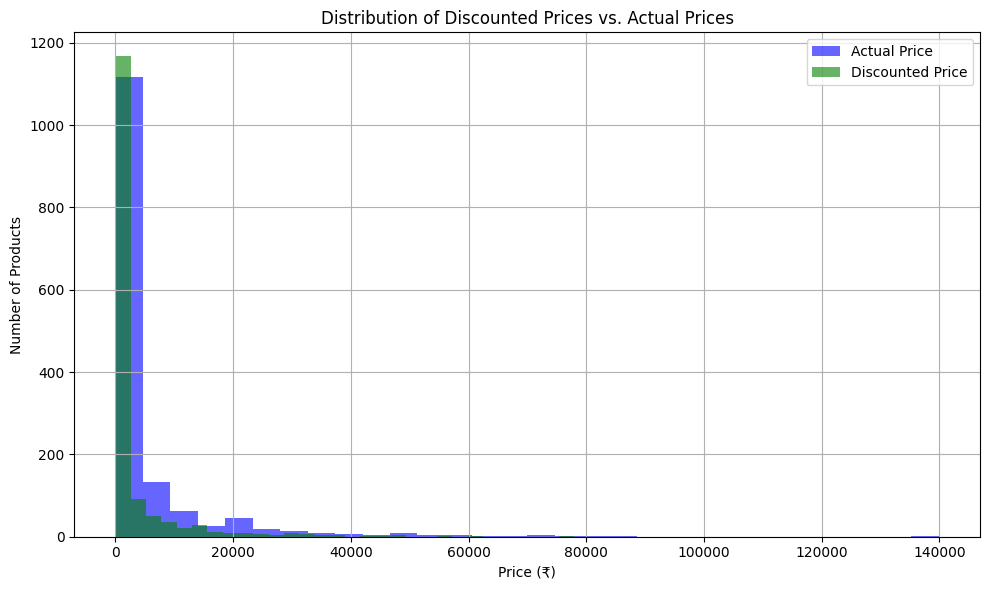

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("amazon.csv")
df['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df['actual_price'] = df['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)

plt.figure(figsize=(10, 6))
plt.hist(df['actual_price'], bins=30, alpha=0.6, label='Actual Price', color='blue')
plt.hist(df['discounted_price'], bins=30, alpha=0.6, label='Discounted Price', color='green')
plt.xlabel('Price (₹)')
plt.ylabel('Number of Products')
plt.title('Distribution of Discounted Prices vs. Actual Prices')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Q4.How does the average discount percentage vary across categories?

In [10]:
import pandas as pd

df = pd.read_csv("amazon.csv")
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').astype(float)
df['main_category'] = df['category'].str.split('|').str[0]

avg_discount_by_category = df.groupby('main_category')['discount_percentage'].mean().sort_values(ascending=False)
print(avg_discount_by_category)


main_category
HomeImprovement          57.500000
Computers&Accessories    54.024283
Health&PersonalCare      53.000000
Electronics              50.828897
MusicalInstruments       46.000000
Car&Motorbike            42.000000
Home&Kitchen             40.120536
OfficeProducts           12.354839
Toys&Games                0.000000
Name: discount_percentage, dtype: float64


Q5.What are the most popular product names?

In [12]:
import pandas as pd

df = pd.read_csv("amazon.csv")
df['rating_count'] = df['rating_count'].str.replace(',', '', regex=True)
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce').fillna(0).astype(int) # Convert to numeric, handle errors, fill NaN with 0, and then to int

most_popular_products = df.groupby('product_name')['rating_count'].sum().sort_values(ascending=False).head(10)
print(most_popular_products)


product_name
AmazonBasics Flexible Premium HDMI Cable (Black, 4K@60Hz, 18Gbps), 3-Foot                                                                  853945
Amazon Basics High-Speed HDMI Cable, 6 Feet - Supports Ethernet, 3D, 4K video,Black                                                        426973
Amazon Basics High-Speed HDMI Cable, 6 Feet (2-Pack),Black                                                                                 426973
JBL C100SI Wired In Ear Headphones with Mic, JBL Pure Bass Sound, One Button Multi-function Remote, Angled Buds for Comfort fit (Black)    385177
boAt Bassheads 100 in Ear Wired Earphones with Mic(Taffy Pink)                                                                             363713
boAt Bassheads 100 in Ear Wired Earphones with Mic(Furious Red)                                                                            363713
boAt BassHeads 100 in-Ear Wired Headphones with Mic (Black)                                                    

Q6.What are the most popular product keywords?

In [13]:
import pandas as pd
from collections import Counter
import re

df = pd.read_csv("amazon.csv")
text = ' '.join(df['product_name'].dropna().astype(str)).lower()
words = re.findall(r'\b\w+\b', text)
word_counts = Counter(words)
stop_words = {'with', 'for', 'and', 'the', 'of', 'in', 'to', 'a', 'on', 'by', 'an', 'at', 'is', 'from', 'or', 'be'}
filtered_keywords = {word: count for word, count in word_counts.items() if word not in stop_words}
most_common_keywords = Counter(filtered_keywords).most_common(20)
print(most_common_keywords)


[('black', 530), ('usb', 417), ('cable', 414), ('1', 413), ('c', 289), ('3', 275), ('2', 267), ('charging', 247), ('type', 243), ('fast', 212), ('smart', 175), ('white', 170), ('tv', 152), ('compatible', 146), ('5', 137), ('data', 136), ('hd', 135), ('4', 133), ('led', 129), ('8', 125)]


Q7.What are the most popular product reviews?

In [15]:
import pandas as pd

df = pd.read_csv("amazon.csv")
df['rating_count'] = df['rating_count'].str.replace(',', '', regex=True)
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')  # Convert to numeric, coerce errors to NaN
df['rating_count'] = df['rating_count'].fillna(0).astype(int)  # Fill NaN with 0, and then convert to int
popular_reviews = df.sort_values(by='rating_count', ascending=False)[['product_name', 'review_title', 'review_content', 'rating_count']].dropna().head(10)
print(popular_reviews)


                                          product_name  \
12   AmazonBasics Flexible Premium HDMI Cable (Blac...   
65   Amazon Basics High-Speed HDMI Cable, 6 Feet (2...   
47   Amazon Basics High-Speed HDMI Cable, 6 Feet - ...   
684  AmazonBasics Flexible Premium HDMI Cable (Blac...   
400  boAt Bassheads 100 in Ear Wired Earphones with...   
352  boAt Bassheads 100 in Ear Wired Earphones with...   
584  boAt BassHeads 100 in-Ear Wired Headphones wit...   
371  Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...   
370  Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...   
566  Redmi 9A Sport (Coral Green, 3GB RAM, 32GB Sto...   

                                          review_title  \
12   It's quite good and value for money,Works well...   
65   It's quite good and value for money,Works well...   
47   It's quite good and value for money,Works well...   
684  It's quite good and value for money,Works well...   
400  Best value for money,HEAD PHONE POUCH NOT RECE...   
352  Best val

Q8.What is the correlation between discounted _price and rating?

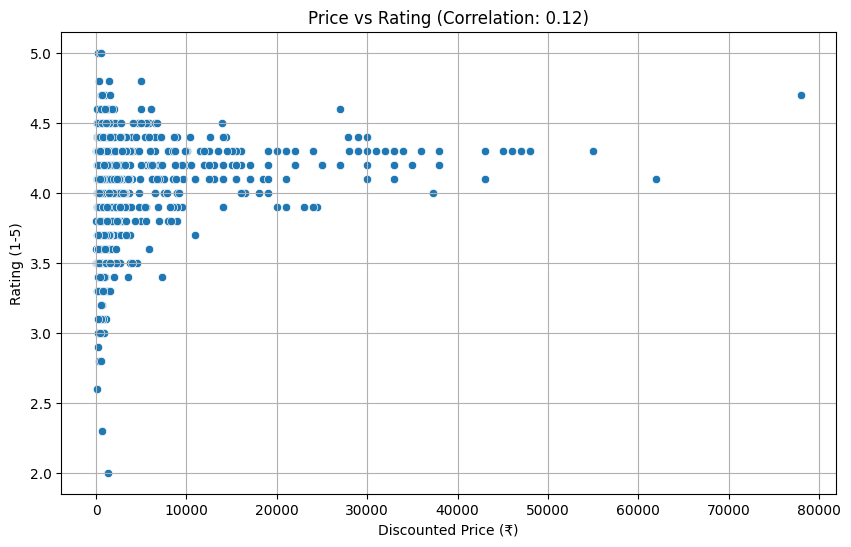

Correlation between discounted price and rating: 0.120


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
data = pd.read_csv('amazon.csv')

def clean_price(price):
    if isinstance(price, str):
        return float(re.sub(r'[^\d.]', '', price))
    return price

data['discounted_price'] = data['discounted_price'].apply(clean_price)
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

clean_data = data[['discounted_price', 'rating']].dropna()

correlation = clean_data['discounted_price'].corr(clean_data['rating'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='discounted_price', y='rating', data=clean_data)
plt.title(f'Price vs Rating (Correlation: {correlation:.2f})')
plt.xlabel('Discounted Price (₹)')
plt.ylabel('Rating (1-5)')
plt.grid(True)
plt.show()

print(f"Correlation between discounted price and rating: {correlation:.3f}")

Q9.What are the Top 5 categories based on the highest ratings?

In [35]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['categories'] = df['category'].str.split('|')
exploded_df = df.explode('categories')
category_ratings = exploded_df.groupby('categories')['rating'].agg(['mean', 'count'])
significant_categories = category_ratings[category_ratings['count'] >= 5]
top_5_categories = significant_categories.sort_values('mean', ascending=False).head(5)

print("Top 5 Categories by Average Rating:")
print(top_5_categories[['mean']].round(2))

Top 5 Categories by Average Rating:
                            mean
categories                      
Maintenance,Upkeep&Repairs  4.47
DeepFatFryers               4.46
AirFryers                   4.46
DisposableBatteries         4.41
ExternalHardDisks           4.40


Q10.Identify any potential areas for improvement or optimization based on the data analysis.

Price-Rating Correlation: 0.12


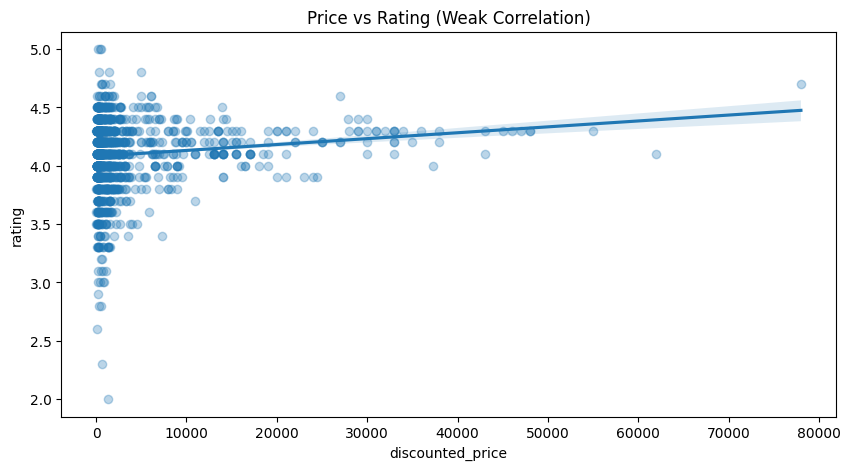


Top Performing Categories:
                       avg_rating  product_count
primary_category                                
OfficeProducts           4.309677             31
Computers&Accessories    4.154967            453
Electronics              4.081749            526
Home&Kitchen             4.040716            448

Underperforming Categories:
                       avg_rating  product_count
primary_category                                
OfficeProducts           4.309677             31
Computers&Accessories    4.154967            453
Electronics              4.081749            526
Home&Kitchen             4.040716            448

Review Coverage Opportunities:
Empty DataFrame
Columns: [avg_reviews, avg_rating]
Index: []


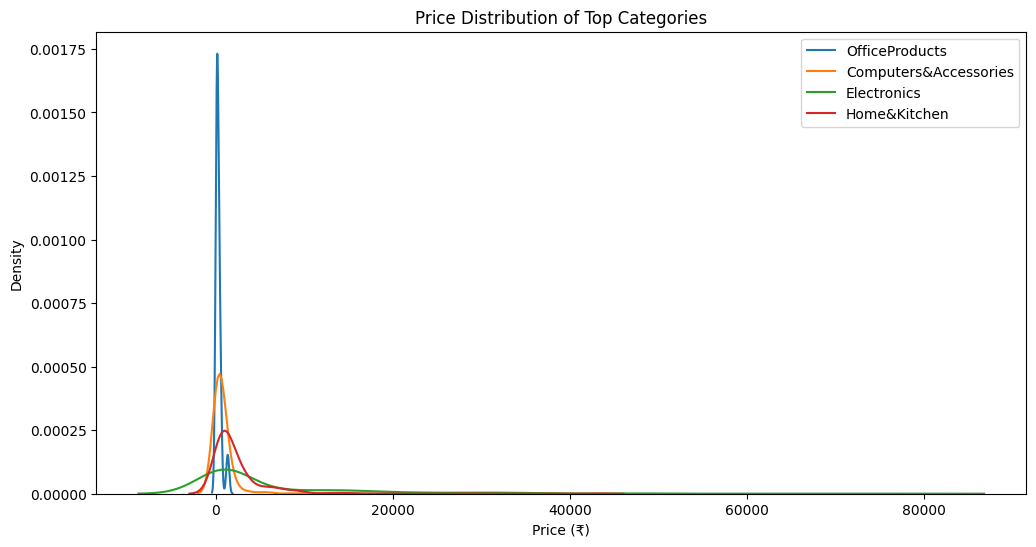


Hidden Gem Products (High Rating, Low Reviews):
                                           product_name  \
174   Syncwire LTG to USB Cable for Fast Charging Co...   
775   Amazon Basics Wireless Mouse | 2.4 GHz Connect...   
1201  Oratech Coffee Frother electric, milk frother ...   
1226  Zuvexa USB Rechargeable Electric Foam Maker - ...   
1216  VRPRIME Lint Roller Lint Remover for Clothes, ...   
1293  Melbon VM-905 2000-Watt Room Heater (ISI Certi...   
1158  !!1000 Watt/2000-Watt Room Heater!! Fan Heater...   
1267  Gadgetronics Digital Kitchen Weighing Scale & ...   
1164  Homeistic Applience™ Instant Electric Water He...   
547   Noise_Colorfit Smart Watch Charger 2 Pin USB F...   

           primary_category  rating  review_count  
174   Computers&Accessories     5.0           5.0  
775   Computers&Accessories     5.0          23.0  
1201           Home&Kitchen     4.8          28.0  
1226           Home&Kitchen     4.7          54.0  
1216           Home&Kitchen     4.6      

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean data
df = pd.read_csv('amazon.csv')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['discounted_price'] = df['discounted_price'].str.replace('₹','').str.replace(',','').astype(float)

# 1. Pricing Strategy Analysis
price_rating_corr = df[['discounted_price','rating']].corr().iloc[0,1]
print(f"Price-Rating Correlation: {price_rating_corr:.2f}")

# Visualize
plt.figure(figsize=(10,5))
sns.regplot(x='discounted_price', y='rating', data=df, scatter_kws={'alpha':0.3})
plt.title('Price vs Rating (Weak Correlation)')
plt.show()

# 2. Category Performance Analysis
df['primary_category'] = df['category'].str.split('|').str[0]
category_stats = df.groupby('primary_category').agg(
    avg_rating=('rating','mean'),
    product_count=('product_id','count'),
    avg_price=('discounted_price','mean')
).sort_values('avg_rating', ascending=False)

# Filter significant categories (min 5 products)
significant_cats = category_stats[category_stats['product_count'] >= 5]
top_cats = significant_cats.head(5)
worst_cats = significant_cats.tail(5)

print("\nTop Performing Categories:")
print(top_cats[['avg_rating','product_count']])
print("\nUnderperforming Categories:")
print(worst_cats[['avg_rating','product_count']])

# 3. Review Analysis Optimization
df['review_count'] = df['rating_count'].str.replace(',','').astype(float)
review_analysis = df.groupby('primary_category').agg(
    avg_reviews=('review_count','mean'),
    avg_rating=('rating','mean')
).sort_values('avg_reviews')

print("\nReview Coverage Opportunities:")
print(review_analysis[review_analysis['avg_reviews'] < 1000].sort_values('avg_rating', ascending=False))

# 4. Price Distribution Analysis
plt.figure(figsize=(12,6))
for category in top_cats.index:
    sns.kdeplot(df[df['primary_category']==category]['discounted_price'], label=category)
plt.title('Price Distribution of Top Categories')
plt.xlabel('Price (₹)')
plt.legend()
plt.show()

# 5. Recommendation Engine Input
high_rated_low_reviews = df[(df['rating'] >= 4) & (df['review_count'] < 100)]
print("\nHidden Gem Products (High Rating, Low Reviews):")
print(high_rated_low_reviews[['product_name','primary_category','rating','review_count']].sort_values('rating', ascending=False).head(10))

#EDA 4

Q1.Read the dataframe, check null value if present then do the needful, check duplicate row, if present then do the needful.

In [17]:
import pandas as pd

df = pd.read_csv('spotify.csv')

print("Null values:")
print(df.isnull().sum())

print("\nDuplicate rows:", df.duplicated().sum())

Null values:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

Duplicate rows: 27


Q2.What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

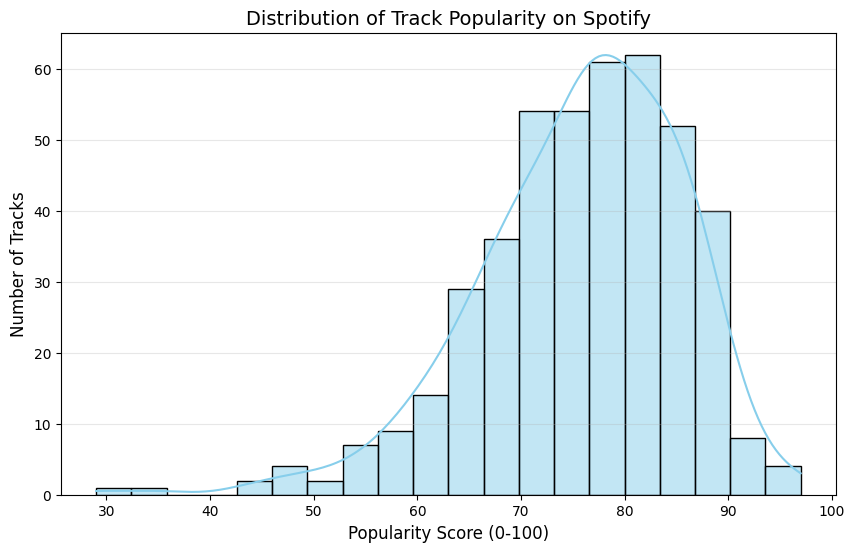

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Popularity', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Track Popularity on Spotify', fontsize=14)
plt.xlabel('Popularity Score (0-100)', fontsize=12)
plt.ylabel('Number of Tracks', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

Q3.Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

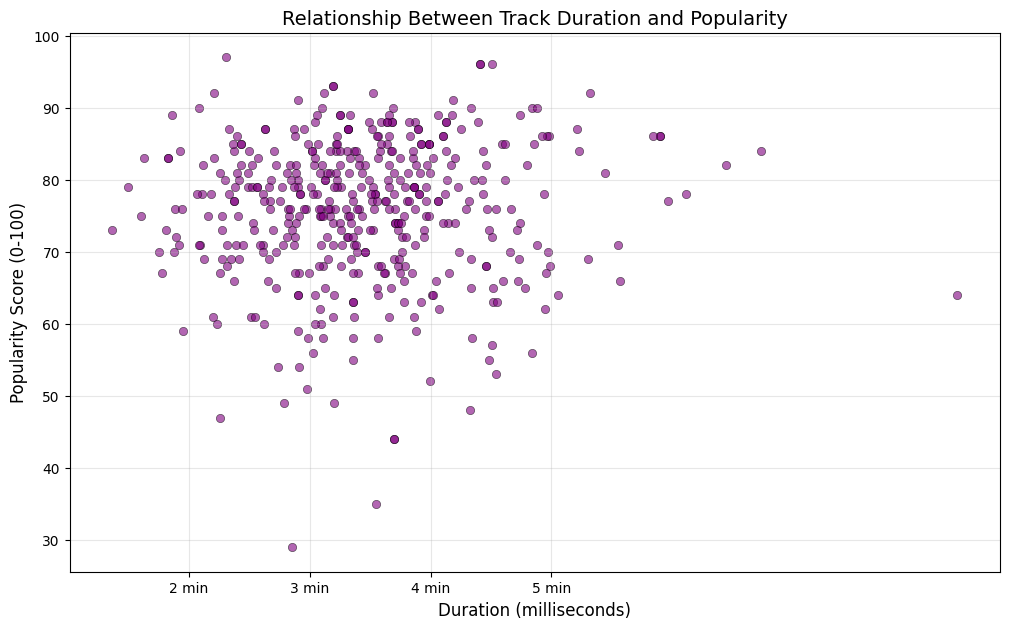

In [19]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='Duration (ms)', y='Popularity',
                alpha=0.6, color='purple', edgecolor='black')
plt.title('Relationship Between Track Duration and Popularity', fontsize=14)
plt.xlabel('Duration (milliseconds)', fontsize=12)
plt.ylabel('Popularity Score (0-100)', fontsize=12)

# Convert milliseconds to minutes for better readability
seconds = [120000, 180000, 240000, 300000]  # 2,3,4,5 minutes
plt.xticks(seconds, ['2 min', '3 min', '4 min', '5 min'])

plt.grid(alpha=0.3)
plt.show()

Q4.Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.

<ipython-input-20-c1e81519c2ca>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, y='Artist',


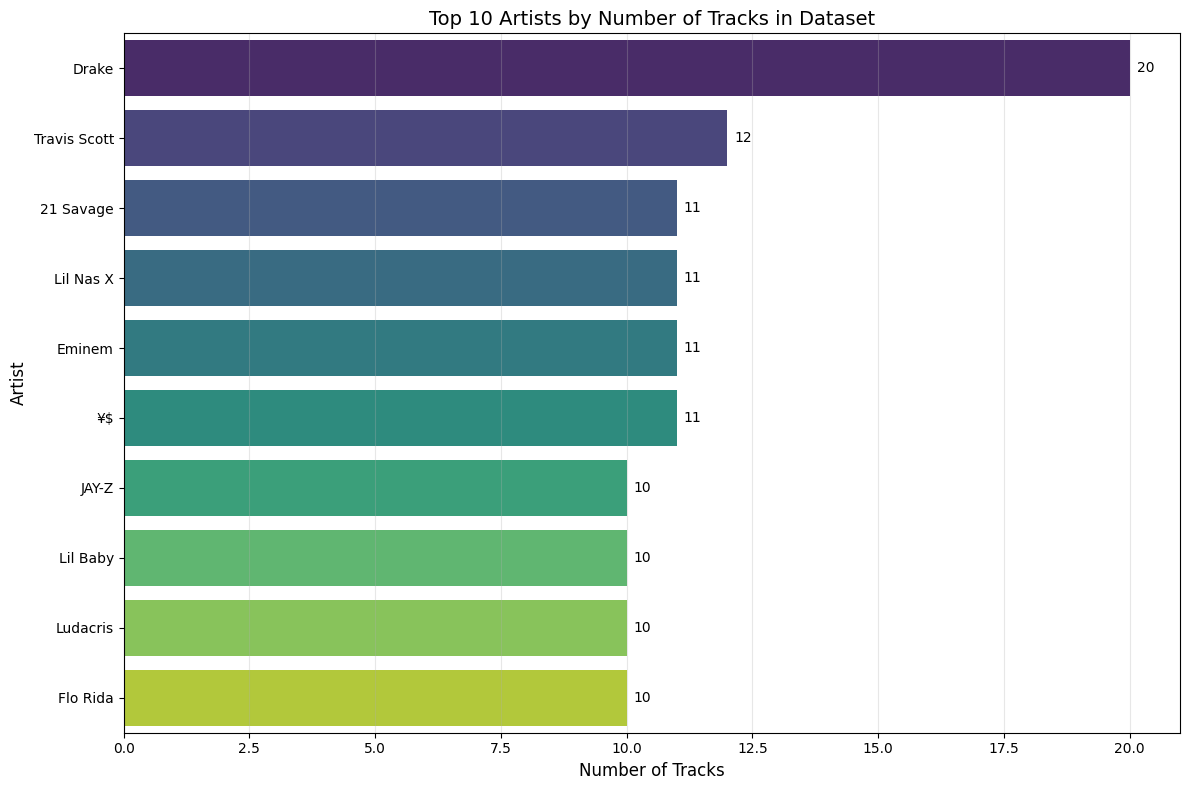


Artist with most tracks: Drake (20 tracks)


<ipython-input-20-c1e81519c2ca>:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"\nArtist with most tracks: {max_artist} ({top_artists[0]} tracks)")


In [20]:
plt.figure(figsize=(12, 8))
top_artists = df['Artist'].value_counts().head(10)  # Get top 10 artists

# Create countplot
ax = sns.countplot(data=df, y='Artist',
                  order=top_artists.index,
                  palette='viridis')

# Add annotations
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}',
               (p.get_width(), p.get_y() + p.get_height()/2.),
               ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.title('Top 10 Artists by Number of Tracks in Dataset', fontsize=14)
plt.xlabel('Number of Tracks', fontsize=12)
plt.ylabel('Artist', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Get the artist with maximum tracks
max_artist = top_artists.index[0]
print(f"\nArtist with most tracks: {max_artist} ({top_artists[0]} tracks)")

Q5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

In [21]:
least_popular = df.sort_values('Popularity').head(5)[['Artist', 'Track Name', 'Popularity']]
print(least_popular.to_string(index=False))

        Artist                    Track Name  Popularity
        Pressa Attachments (feat. Coi Leray)          29
 Justin Bieber                    Intentions          35
French Montana               Splash Brothers          44
French Montana               Splash Brothers          44
      Lil Baby                 On Me - Remix          47


Q6.Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.

In [22]:
top5_artists = df['Artist'].value_counts().head(5).index
avg_popularity = df[df['Artist'].isin(top5_artists)].groupby('Artist')['Popularity'].mean()
avg_popularity = avg_popularity.sort_values(ascending=False)
print("Average Popularity of Top 5 Artists:")
print(avg_popularity.to_string())

# Identify artist with highest average popularity
highest_avg_artist = avg_popularity.idxmax()
print(f"\nArtist with highest average popularity: {highest_avg_artist} ({avg_popularity.max():.1f})")

Average Popularity of Top 5 Artists:
Artist
Travis Scott    87.000000
21 Savage       84.181818
Eminem          83.636364
Drake           83.500000
Lil Nas X       76.090909

Artist with highest average popularity: Travis Scott (87.0)


Q7.For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

In [23]:
top5_artists = df['Artist'].value_counts().head(5).index

for artist in top5_artists:
    artist_tracks = df[df['Artist'] == artist]
    top_track = artist_tracks.loc[artist_tracks['Popularity'].idxmax()]
    print(f"{artist}: {top_track['Track Name']} (Popularity: {top_track['Popularity']})")

Drake: Rich Baby Daddy (feat. Sexyy Red & SZA) (Popularity: 92)
Travis Scott: FE!N (feat. Playboi Carti) (Popularity: 93)
21 Savage: redrum (Popularity: 96)
Lil Nas X: THATS WHAT I WANT (Popularity: 81)
Eminem: Without Me (Popularity: 90)


Q8.Visualize relationships between multiple numerical variables simultaneously using a pair plot.

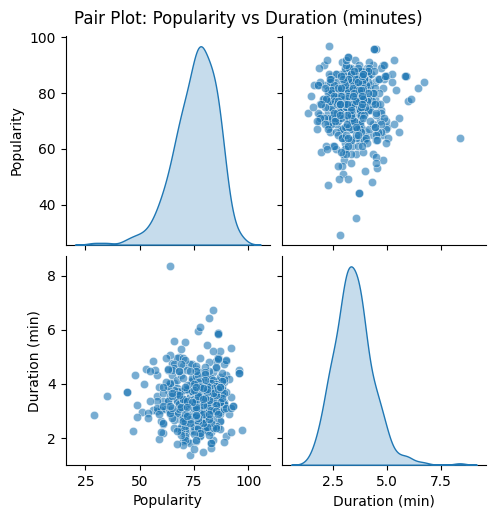

In [24]:
df_minutes = df.copy()
df_minutes['Duration (min)'] = df['Duration (ms)'] / 60000

sns.pairplot(df_minutes[['Popularity', 'Duration (min)']],
             diag_kind='kde',
             plot_kws={'alpha': 0.6})
plt.suptitle('Pair Plot: Popularity vs Duration (minutes)', y=1.02)
plt.show()

Q9.Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.

<ipython-input-25-93b00447f32f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Duration (min)'] = filtered_df['Duration (ms)'] / 60000
<ipython-input-25-93b00447f32f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, y='Artist', x='Duration (min)', palette='viridis')


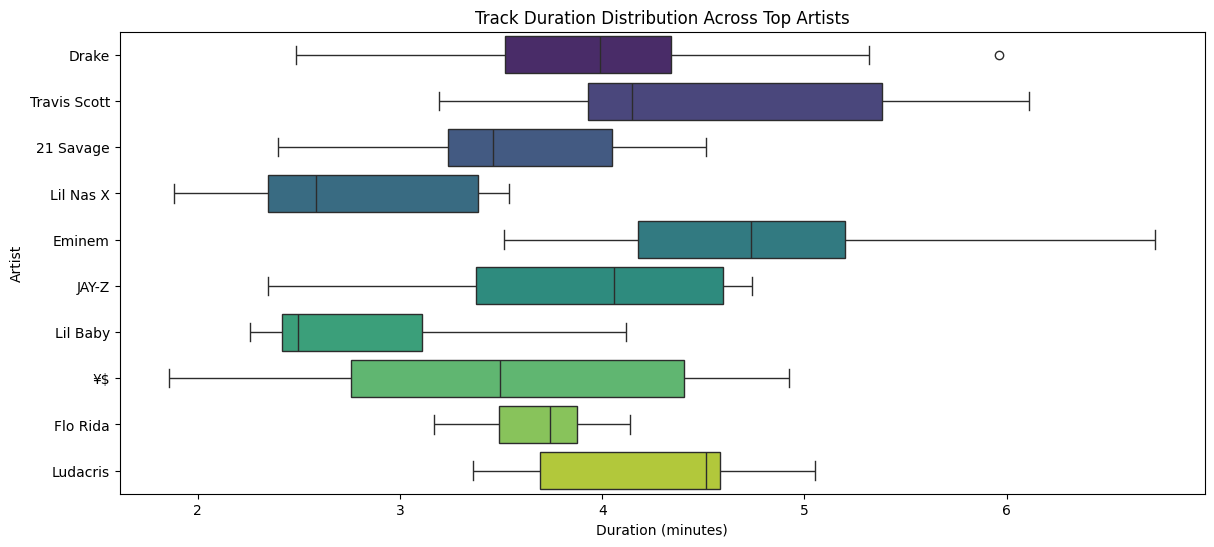

In [25]:
plt.figure(figsize=(14, 6))
top_artists = df['Artist'].value_counts().head(10).index
filtered_df = df[df['Artist'].isin(top_artists)]
filtered_df['Duration (min)'] = filtered_df['Duration (ms)'] / 60000

sns.boxplot(data=filtered_df, y='Artist', x='Duration (min)', palette='viridis')
plt.title('Track Duration Distribution Across Top Artists')
plt.xlabel('Duration (minutes)')
plt.ylabel('Artist')
plt.show()

Q10.How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

<ipython-input-27-dde9365f6d2f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=filtered_df, x='Popularity', y='Artist',
<ipython-input-27-dde9365f6d2f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=filtered_df, x='Popularity', y='Artist',


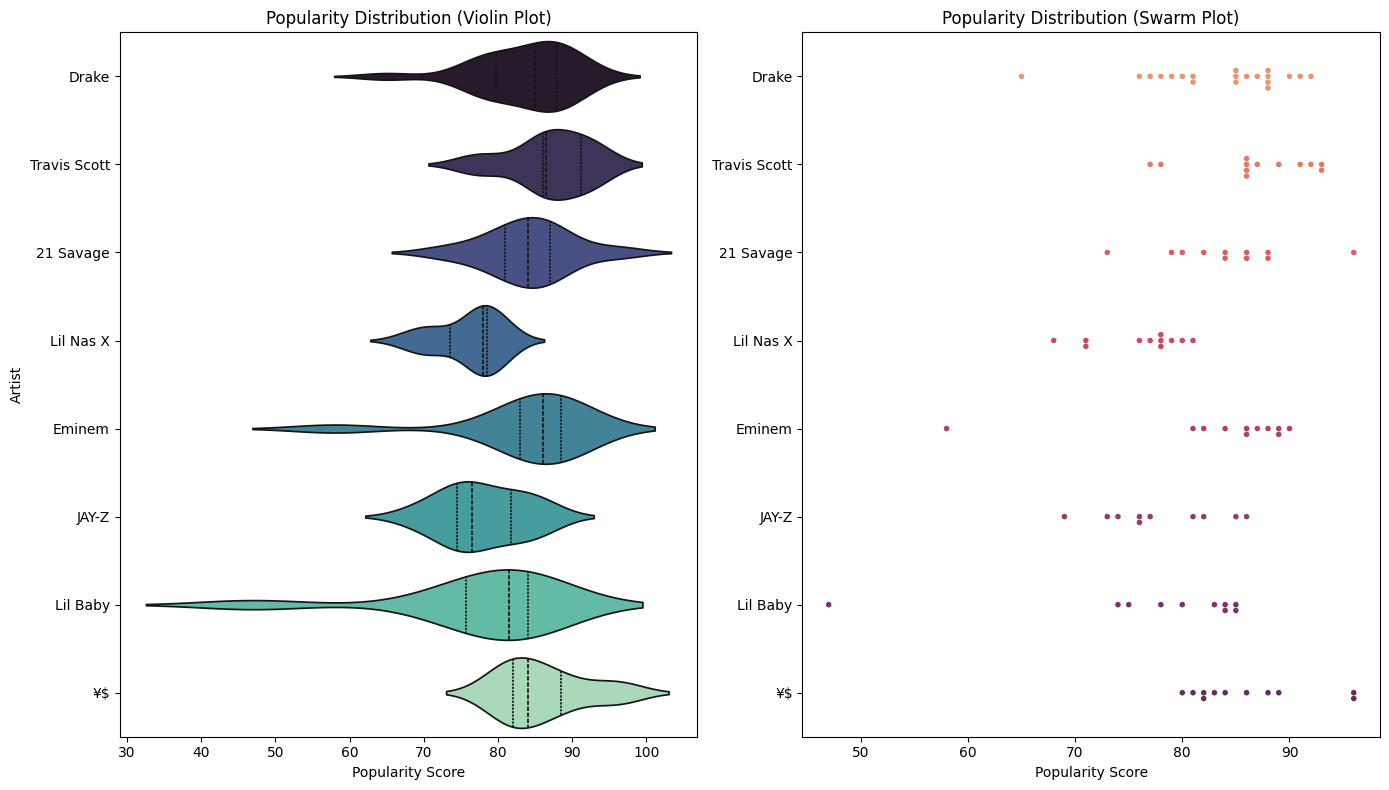

In [27]:
plt.figure(figsize=(14, 8))
top_artists = df['Artist'].value_counts().head(8).index
filtered_df = df[df['Artist'].isin(top_artists)]
plt.subplot(1, 2, 1)
sns.violinplot(data=filtered_df, x='Popularity', y='Artist',
              palette='mako', inner='quartile')
plt.title('Popularity Distribution (Violin Plot)')
plt.xlabel('Popularity Score')
plt.ylabel('Artist')
plt.subplot(1, 2, 2)
sns.swarmplot(data=filtered_df, x='Popularity', y='Artist',
             palette='flare', size=4)
plt.title('Popularity Distribution (Swarm Plot)')
plt.xlabel('Popularity Score')
plt.ylabel('')
plt.tight_layout()
plt.show()